In [1]:
import numpy as np
import pandas as pd
import awkward as ak
import uproot

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
# Aesthetics:
fs = 14    # fontsize

In [5]:
path = "/home/mattia/Downloads/AO2Dtree.root"
file = uproot.open(path)
file.classnames()

{'DF_2300238590827776;1': 'TDirectory',
 'DF_2300238590827776/O2collision_001;1': 'TTree',
 'DF_2300238590827776/O2filtertrack;1': 'TTree',
 'DF_2300238590827776/O2filtertrackextr;1': 'TTree',
 'DF_2300238590872672;1': 'TDirectory',
 'DF_2300238590872672/O2collision_001;1': 'TTree',
 'DF_2300238590872672/O2filtertrack;1': 'TTree',
 'DF_2300238590872672/O2filtertrackextr;1': 'TTree',
 'DF_2300238590885888;1': 'TDirectory',
 'DF_2300238590885888/O2collision_001;1': 'TTree',
 'DF_2300238590885888/O2filtertrack;1': 'TTree',
 'DF_2300238590885888/O2filtertrackextr;1': 'TTree',
 'DF_2300238590919936;1': 'TDirectory',
 'DF_2300238590919936/O2collision_001;1': 'TTree',
 'DF_2300238590919936/O2filtertrack;1': 'TTree',
 'DF_2300238590919936/O2filtertrackextr;1': 'TTree',
 'DF_2300238590971008;1': 'TDirectory',
 'DF_2300238590971008/O2collision_001;1': 'TTree',
 'DF_2300238590971008/O2filtertrack;1': 'TTree',
 'DF_2300238590971008/O2filtertrackextr;1': 'TTree',
 'DF_2300238590997568;1': 'TDirecto

In [6]:
file["DF_2300238590827776/O2collision_001"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fIndexBCs            | int32_t                  | AsDtype('>i4')
fPosX                | float                    | AsDtype('>f4')
fPosY                | float                    | AsDtype('>f4')
fPosZ                | float                    | AsDtype('>f4')
fCovXX               | float                    | AsDtype('>f4')
fCovXY               | float                    | AsDtype('>f4')
fCovYY               | float                    | AsDtype('>f4')
fCovXZ               | float                    | AsDtype('>f4')
fCovYZ               | float                    | AsDtype('>f4')
fCovZZ               | float                    | AsDtype('>f4')
fFlags               | uint16_t                 | AsDtype('>u2')
fChi2                | float                    | AsDtype('>f4')
fNumContrib          | uint16_t                 | AsDtype(

In [7]:
# careful with this: if there is too much data it might crash: use entry_stop=N to limit the entries loaded
# Also, pandas is the slower than numpy and should be avoided in case of jagged arrays; however it is fancy
file["DF_2300238590827776/O2collision_001"].arrays(library="pd")

,fIndexBCs,fPosX,fPosY,fPosZ,fCovXX,fCovXY,fCovYY,fCovXZ,fCovYZ,fCovZZ,fFlags,fChi2,fNumContrib,fCollisionTime,fCollisionTimeRes
0,2,-0.027438,-0.027783,-4.128410,3.753230e-06,5.601905e-07,2.108514e-06,1.044944e-06,6.980263e-07,3.207475e-06,0,51.125000,26,-0.660344,7.457031
1,11,-0.036509,-0.024888,-9.061310,1.470745e-05,8.127245e-09,1.904368e-05,-3.317371e-06,-1.585484e-05,6.556511e-05,0,1.557617,2,3.174549,257.250000
2,13,-0.032792,-0.022949,-8.386139,4.909933e-06,-1.978129e-06,5.424023e-06,6.817281e-07,-2.011657e-06,5.148351e-06,0,4.046875,6,-0.519399,10.117188
3,18,-0.032568,-0.032371,4.198601,4.486647e-07,3.672903e-08,5.061738e-07,-4.121830e-09,-6.332994e-08,4.605390e-07,0,104.562500,55,-0.129399,2.173828
4,23,-0.037373,-0.029452,1.461815,8.724630e-06,6.001443e-06,1.117587e-05,-3.911555e-07,-7.804483e-07,5.256385e-06,0,5.023438,4,-0.473204,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,65770,-0.028508,-0.026722,4.524841,3.902242e-07,-2.811430e-08,5.955808e-07,1.839362e-08,-1.584413e-07,5.355105e-07,0,78.312500,45,-0.409523,4.601562
12380,65774,-0.030117,-0.030370,4.472672,2.175570e-06,-4.912727e-07,2.536923e-06,-7.817289e-08,-3.499445e-07,1.906417e-06,0,23.875000,15,-0.345562,6.062500
12381,65778,-0.038076,-0.031963,2.403885,1.433305e-06,-3.303867e-07,1.620501e-06,7.974450e-08,3.012829e-07,1.605600e-06,0,34.062500,21,10.894775,86.312500
12382,65783,-0.035579,-0.035610,2.544521,4.492700e-06,4.724134e-07,4.209578e-06,-2.702698e-06,-1.453795e-06,8.299947e-06,0,54.781250,12,-2.988277,160.750000


In [8]:
file["DF_2300238590827776/O2filtertrack"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fIndexCollisions     | int32_t                  | AsDtype('>i4')
fIsInsideBeamPipe    | int32_t                  | AsDtype('>i4')
fTrackType           | uint8_t                  | AsDtype('uint8')
fX                   | float                    | AsDtype('>f4')
fAlpha               | float                    | AsDtype('>f4')
fY                   | float                    | AsDtype('>f4')
fZ                   | float                    | AsDtype('>f4')
fSnp                 | float                    | AsDtype('>f4')
fTgl                 | float                    | AsDtype('>f4')
fSigned1Pt           | float                    | AsDtype('>f4')


In [9]:
file["DF_2300238590827776/O2filtertrack"].arrays(library="pd")

,fIndexCollisions,fIsInsideBeamPipe,fTrackType,fX,fAlpha,fY,fZ,fSnp,fTgl,fSigned1Pt
0,0,1,1,0.030319,-3.031685,0.015100,-4.127120,-3.275914e-07,-0.424477,-1.322989
1,0,1,1,-0.017226,-0.322267,-0.030717,-4.129672,-9.804604e-08,0.634659,1.508142
2,0,1,1,0.027611,-3.135348,0.037229,-4.130205,5.807100e-07,0.479332,-2.150477
3,0,1,1,0.036497,-2.713416,0.027809,-4.132064,1.633476e-06,-0.178895,-2.840999
4,2,1,1,-0.019782,-0.443220,-0.029422,-8.384316,7.599526e-07,0.293518,-2.301674
...,...,...,...,...,...,...,...,...,...,...
67068,12380,1,1,0.021540,2.888159,0.036426,4.472124,-3.495668e-07,-0.552475,2.048780
67069,12381,1,1,-0.038396,1.386600,0.032234,2.403407,4.365330e-07,0.452370,-1.218866
67070,12381,1,1,-0.049607,0.763879,0.001972,2.406586,-5.677445e-07,0.427406,1.646495
67071,12381,1,1,0.048661,-2.649409,0.030211,2.440591,-7.160132e-07,-0.416076,3.205161


In [10]:
file["DF_2300238590827776/O2filtertrackextr"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fPt                  | float                    | AsDtype('>f4')
fEta                 | float                    | AsDtype('>f4')
fCharge              | int32_t                  | AsDtype('>i4')
fDcaXY               | float                    | AsDtype('>f4')
fDcaZ                | float                    | AsDtype('>f4')
fSigmaDcaXY2         | float                    | AsDtype('>f4')
fSigmaDcaZ2          | float                    | AsDtype('>f4')
fNsigmaTPCpi         | float                    | AsDtype('>f4')
fNsigmaTPCka         | float                    | AsDtype('>f4')
fNsigmaTPCpr         | float                    | AsDtype('>f4')
fNsigmaTOFpi         | float                    | AsDtype('>f4')
fNsigmaTOFka         | float                    | AsDtype('>f4')
fNsigmaTOFpr         | float                    | AsDtype(

In [11]:
file["DF_2300238590827776/O2filtertrackextr"].arrays(library="pd")

,fPt,fEta,fCharge,fDcaXY,fDcaZ,fSigmaDcaXY2,fSigmaDcaZ2,fNsigmaTPCpi,fNsigmaTPCka,fNsigmaTPCpr,fNsigmaTOFpi,fNsigmaTOFka,fNsigmaTOFpr
0,0.755864,-0.412664,-1,-0.009506,0.001290,0.000016,0.000019,0.747714,-1.404644,-7.891112,2.037047,-20.068079,-44.163731
1,0.663068,0.598317,1,0.004326,-0.001262,0.000028,0.000036,1.840203,-0.856808,-8.746990,2.117946,-25.464684,-52.459072
2,0.465013,0.462649,-1,0.009618,-0.001794,0.000100,0.000121,54.468903,22.347868,-1.110935,-999.000000,-999.000000,-999.000000
3,0.351989,-0.177954,-1,0.013927,-0.003654,0.000044,0.000049,-0.477576,-10.363797,-12.495899,-999.000000,-999.000000,-999.000000
4,0.434466,0.289459,-1,0.005372,0.001822,0.000039,0.000045,-0.658317,-7.938647,-14.160391,-0.196841,-26.088795,-63.488323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67068,0.488095,-0.527648,1,-0.000526,-0.000548,0.000080,0.000101,50.725773,24.870630,0.006216,-999.000000,-999.000000,-999.000000
67069,0.820435,0.438210,-1,0.000657,-0.000478,0.000020,0.000024,1.262884,-0.104793,-6.574961,-999.000000,-999.000000,-999.000000
67070,0.607351,0.415359,1,-0.001284,0.002701,0.000024,0.000027,0.016883,-3.951209,-11.577621,-999.000000,-999.000000,-999.000000
67071,0.311997,-0.404920,1,0.020035,0.036706,0.000081,0.000093,-1.532226,-12.349394,-12.766997,-999.000000,-999.000000,-999.000000


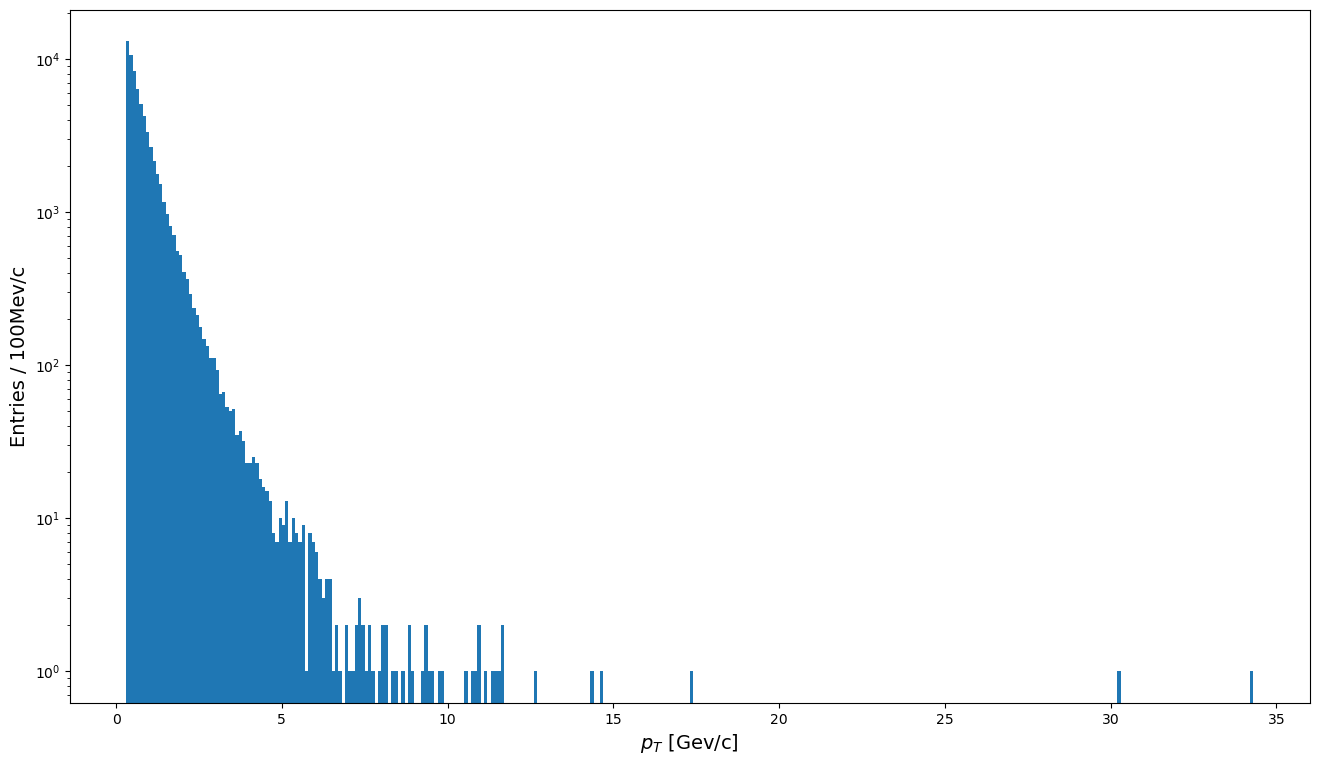

In [12]:
pt = file["DF_2300238590827776/O2filtertrackextr"]["fPt"].array(library="np")
# Wrt the one on the slides: X axis in Gev/c, so binwidth of 100Mev/c is 0.1Gev/c
bin_width = 0.1
bins = np.arange(np.min(pt), np.max(pt) + bin_width, bin_width)
fig, ax = plt.subplots(figsize=(16,9))
plt.hist(pt, bins=bins, log=True)
ax.set_xlabel(r"$p_{T}$ [Gev/c]", fontsize=fs)
ax.set_ylabel("Entries / 100Mev/c",fontsize=fs)
plt.show()

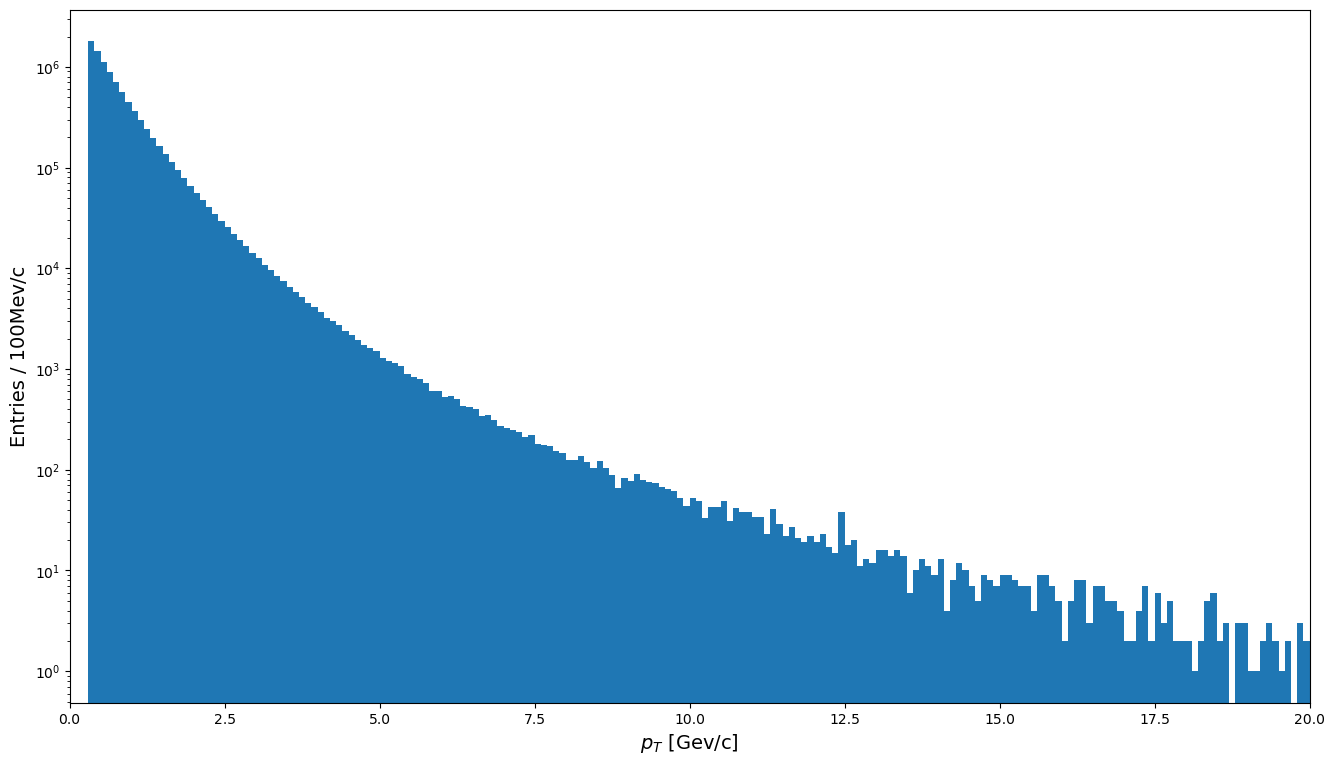

In [13]:
names = file.keys(filter_name=r"*O2filtertrackextr")
values = [file[item]["fPt"].array(library="np") for item in names]
flattened_values = np.concatenate(values)
bin_width = 0.1
bins = np.arange(np.min(flattened_values), np.max(flattened_values) + bin_width, bin_width)
fig, ax = plt.subplots(figsize=(16,9))
plt.hist(flattened_values, bins=bins, log=True,)
ax.set_xlabel(r"$p_{T}$ [Gev/c]", fontsize=fs)
ax.set_xlim( 0, 20 )
ax.set_ylabel("Entries / 100Mev/c",fontsize=fs)
plt.show()

In [15]:
print( f"Entries: {len( flattened_values )}\nMean: {flattened_values.mean():.4f}\nStd Dev: {flattened_values.std():.4f}\nUnderflow: {sum( flattened_values < 0 )}\nOverflow: {sum( flattened_values > 20 )}" )

Entries: 9126260
Mean: 0.8173
Std Dev: 0.6375
Underflow: 0
Overflow: 99


In [21]:
# retrieving the other data line as before
flattened_values_pt = flattened_values
names = file.keys(filter_name=r"*O2filtertrack")
values = [1./np.abs(file[item]["fSigned1Pt"].array(library="np")) for item in names]
flattened_values_spt = np.concatenate(values)

(0.0, 5.0)

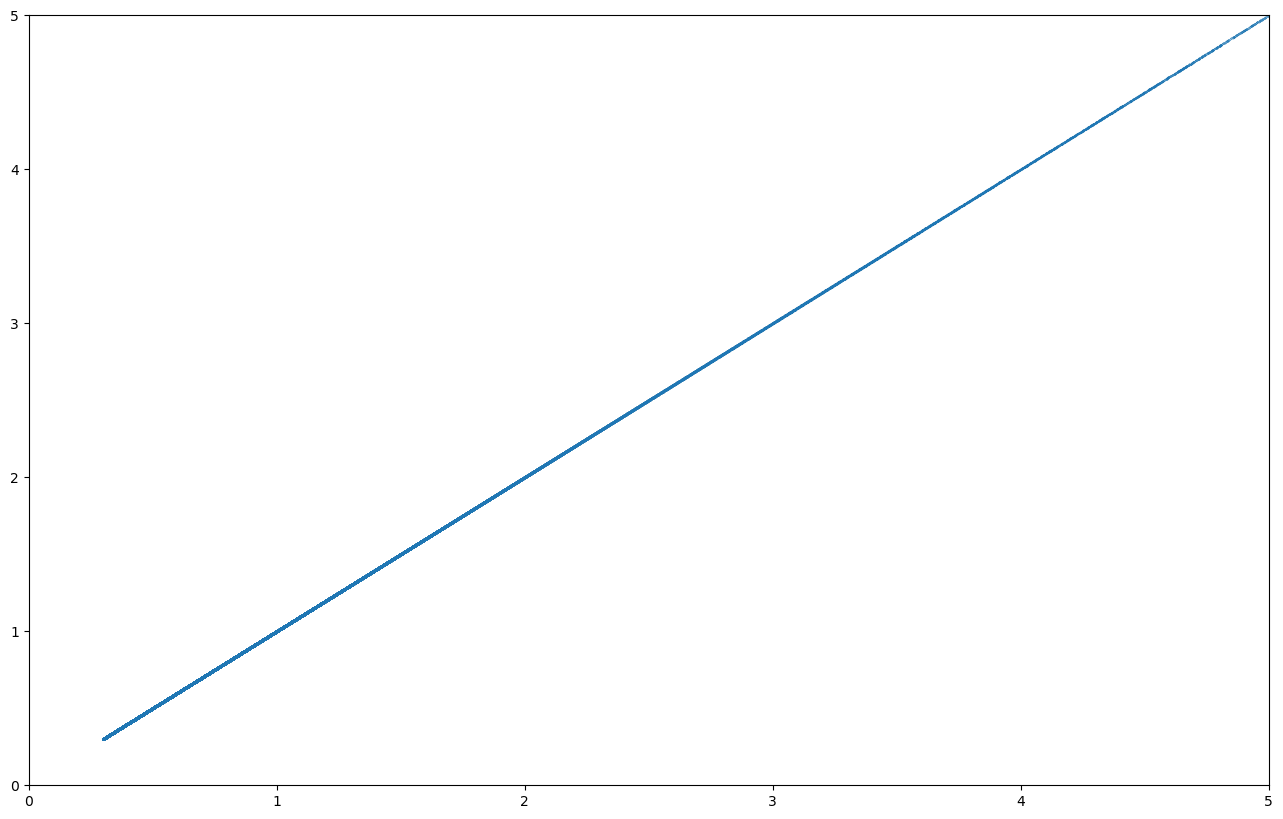

In [22]:
# plt.scatter( x=flattened_values_pt, y=flattened_values_spt, c=np.arange(flattened_values_pt.shape[0]), cmap='rainbow', s=0.1 )
vis_lim = 600000
fig, ax = plt.subplots( figsize=(16,10) )
# ax.scatter( x=flattened_values_pt[ : vis_lim ], y= flattened_values_spt[ : vis_lim ], c=np.arange(vis_lim), cmap='rainbow', s=0.02 )
ax.scatter( x=flattened_values_pt[ : vis_lim ], y= flattened_values_spt[ : vis_lim ], s=0.05 )
ax.set_xlim( 0, 5 )
ax.set_ylim( 0, 5 )

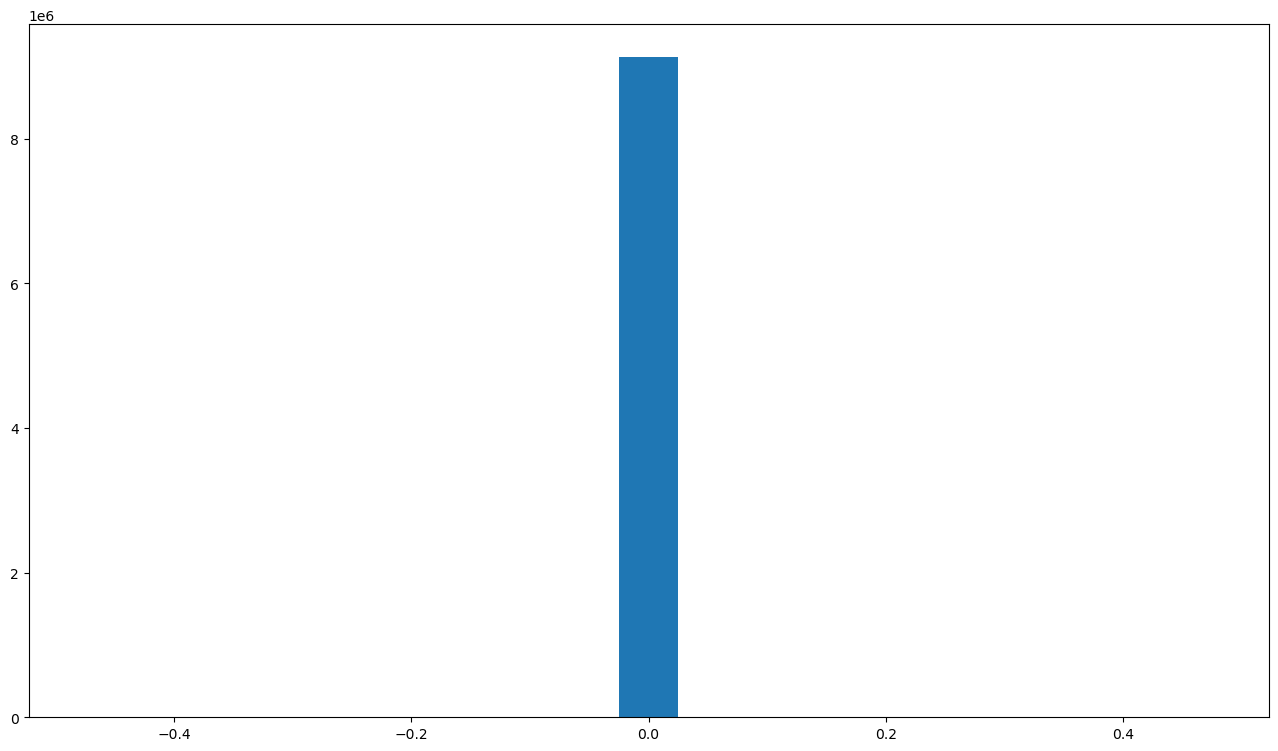

In [23]:
# computing the vector of the differences
# p_diff = flattened_values_spt[flattened_values_spt < 1 ] - flattened_values_pt[ flattened_values_pt < 1 ]
p_diff = flattened_values_spt - flattened_values_pt
bin_width = 0.05
bins = np.arange(-0.5 + bin_width/2, 0.5 + bin_width/2, bin_width)
fig, ax = plt.subplots(figsize=(16,9))
plt.hist(p_diff, bins=bins)
plt.show()

In [24]:
print( f"Entries: {len( p_diff )}\nMean: {p_diff.mean():.4e}\nStd Dev: {p_diff.std():.4e}")

Entries: 9126260
Mean: 0.0000e+00
Std Dev: 0.0000e+00


In [20]:
file.classnames(filter_classname=r"TDirectory")
file.keys(filter_name=r"*O2filtertrack")

['DF_2300238590827776/O2filtertrack;1',
 'DF_2300238590872672/O2filtertrack;1',
 'DF_2300238590885888/O2filtertrack;1',
 'DF_2300238590919936/O2filtertrack;1',
 'DF_2300238590971008/O2filtertrack;1',
 'DF_2300238590997568/O2filtertrack;1',
 'DF_2300238591017856/O2filtertrack;1',
 'DF_2300238591063264/O2filtertrack;1',
 'DF_2300238591109600/O2filtertrack;1',
 'DF_2300238591111168/O2filtertrack;1',
 'DF_2300238591161088/O2filtertrack;1',
 'DF_2300238591201536/O2filtertrack;1',
 'DF_2300238591223840/O2filtertrack;1',
 'DF_2300238591259872/O2filtertrack;1',
 'DF_2300238591299456/O2filtertrack;1',
 'DF_2300238591336512/O2filtertrack;1',
 'DF_2300238591372512/O2filtertrack;1',
 'DF_2300238591391200/O2filtertrack;1',
 'DF_2300238591449216/O2filtertrack;1',
 'DF_2300238591489536/O2filtertrack;1',
 'DF_2300238591491488/O2filtertrack;1',
 'DF_2300238591568768/O2filtertrack;1',
 'DF_2300238591581696/O2filtertrack;1',
 'DF_2300238591604448/O2filtertrack;1',
 'DF_2300238591679840/O2filtertrack;1',
